# Général

### Bibliothèques importées

In [53]:
import numpy as np
import random as rd
import copy as copy
import uuid as uuid
import matplotlib.pyplot as plt

### Variables globales

##### Variables générales

In [3]:
#type(n) : int
#n est la taille de la matrice carrée
n = 100

#type(nb_renards_initial) : int
#nb_renards_initial le nombre initial de renards
nb_renards_initial = 500

#type(nb_lapins_initial) : int
#nb_lapins_initital le nombre initial de lapins
nb_lapins_initial = 1000

#type(M) : int
#M le range de l'entourage de Moore
M = 1

##### Variables relatives aux carottes

In [4]:
#type(probabilite_presence_carotte) : float [0.00 ; 1.00]
#probabilite_presence_carotte est la probabilité qu'il n'y ait pas de carottes sur une case
probabilite_presence_carotte = 0.5

##### Variables relatives aux lapins

In [74]:
#type(esperance_vie_lapin) : int
#esperance_vie_lapin est un nb de jours
esperance_vie_lapin = 2555 #environ 7 ans

#type(efficacite_lapin) : float
#efficacite_lapin est un pondérateur fictif pour éviter un système mathématique trop prédominant, c'est le facteur chance naturel
def efficacite_lapin_specifique():
    return rd.uniform(-0.1,0.1)

#type(maturite_sexuelle_lapin) : int
#maturite_sexuelle_lapin le nb de jours pour pouvoir s'accoupler
maturite_sexuelle_lapin = 310 #donnée réelle, correspond à 10 mois

#type(temps_gestation_lapin) : int
#temps_gestation_lapin le nb de jours avant de mettre bas
temps_gestation_lapin = 55 #donnée réelle

#type(seuil_lapin) : int
#seuil_lapin le pourcentage au dessus duquel le lapin cherchera de la nourriture ou à se reproduire
seuil_lapin = 0.5

##### Variables relatives aux renards

In [75]:
#type(esperance_vie_renard) : int
#esperance_vie_renard est un nb de jours
esperance_vie_renard = 1825 #environ 5 ans

#type(efficacite_renard) : float
#efficacite_renard est l'efficacité de chasse du renard, i.e. sa chance d'attraper le lapin
efficacite_renard_generale = 0.20 #basé sur des données réelles
def efficacite_renard_specifique():
    return rd.uniform(-0.1,0.1)

#type(maturite_sexuelle_renard) : int
#maturite_sexuelle_renard le nb de jours pour pouvoir s'accoupler
maturite_sexuelle_renard = 310 #donnée réelle, correspond à 10 mois

#type(temps_gestation_renard) : int
#temps_gestation_renard le nb de jours avant de mettre bas
temps_gestation_renard = 55 #donnée réelle

#type(seuil_renard) : int
#seuil_renard le pourcentage au dessus duquel le lapin cherchera de la nourriture ou à se reproduire
seuil_renard = 0.5

# Agents

### Renard

In [7]:
def creation_renard(age, position):
    ID = uuid.uuid4()
    sexe = rd.choice([True, False]) #True correspond à femelle
    efficacite = efficacite_renard_generale + efficacite_renard_specifique()
    fecondite = rd.uniform(0.2,1.0)
    faim = rd.random()
    excitation = rd.random()
    gestationnaire = (False, 0, 0) #en gestation ou non, nb de jour avant mis à bas, nb de renardeaux
    type_agent = "renard"
    
    return (ID, (type_agent, (age, sexe, efficacite, fecondite, excitation, faim, gestationnaire, position)))

In [8]:
print(creation_renard())

TypeError: creation_renard() missing 2 required positional arguments: 'age' and 'position'

In [9]:
def creation_renards():
    cpt = 0 #type(cpt) : int
    renards = dict()
    while cpt < nb_renards_initial:
        cpt += 1
        identifiant, renard = creation_renard(rd.randint(0,esperance_vie_renard),(rd.randint(0,n-1),rd.randint(0,n-1)))        
        renards[identifiant] = renard
    return renards

In [10]:
print(creation_renards())

{UUID('8b0a78af-f054-432e-bfd8-08aec4011a68'): ('renard', (1667, False, 0.11250328805438836, 0.9849758898632894, 0.11470886896198718, 0.9311769593310643, (False, 0, 0), (73, 64))), UUID('64a0281f-2e8c-4c70-bdd1-d4cb7b67ac62'): ('renard', (541, True, 0.2925726917928849, 0.4914692133277327, 0.02372626723736282, 0.5533350649912, (False, 0, 0), (73, 58))), UUID('4b3d3e87-2d38-4258-a544-224928f6192c'): ('renard', (502, False, 0.10005510695953612, 0.6532038872637067, 0.12329026811834265, 0.287916545903649, (False, 0, 0), (70, 26))), UUID('236660a2-0df5-4fcd-a08c-8d70ecbc3590'): ('renard', (535, True, 0.21852996433861674, 0.7757623464696708, 0.03972429357467, 0.622191596378495, (False, 0, 0), (3, 58))), UUID('f822b8f0-e842-49a1-b89f-50eaab3312bb'): ('renard', (906, True, 0.10017577771291537, 0.5939638854463676, 0.5625473532767611, 0.8122926178661879, (False, 0, 0), (20, 65))), UUID('2b07d506-da72-4d24-b479-c8c4959cfad8'): ('renard', (1468, True, 0.2783167042081741, 0.8859219536559011, 0.86310

### Lapin

In [11]:
def creation_lapin(age, position):
    """None -> lapin
    lapin : tuple[int, bool, float, float, float, float, tuple[bool, int], tuple[int, int]]"""
    ID = uuid.uuid4()
    sexe = rd.choice([True, False]) #True correspond à femelle
    efficacite = efficacite_lapin_specifique()
    fecondite = rd.uniform(0.2,1.0)
    faim = rd.random()
    excitation = rd.random()
    gestationnaire = (False, 0, 0) #en gestation ou non, nb de jour avant mis à bas, nb de lapinous
    type_agent = "lapin"
    
    return (ID, (type_agent, (age, sexe, efficacite, fecondite, excitation, faim, gestationnaire, position)))

In [12]:
print(creation_lapin())

TypeError: creation_lapin() missing 2 required positional arguments: 'age' and 'position'

In [13]:
def creation_lapins():
    cpt = 0 #type(cpt) : int
    lapins = dict()
    while cpt < nb_renards_initial:
        cpt += 1
        identifiant, lapin = creation_lapin(rd.randint(0, esperance_vie_lapin),(rd.randint(0,n-1),rd.randint(0,n-1)))        
        lapins[identifiant] = lapin
    return lapins

In [14]:
print(creation_lapins())

{UUID('baf3b7cb-8348-4f2a-8bdd-041c0b8d767f'): ('lapin', (1617, True, 0.09304994029980093, 0.5023223400978707, 0.005687616693344277, 0.9025284935671722, (False, 0, 0), (37, 93))), UUID('a203ad8a-e4dd-41dc-a4cb-a98493c1c4fb'): ('lapin', (2159, False, -0.030529744116443144, 0.879481182196109, 0.6549322260078619, 0.7531548426728555, (False, 0, 0), (87, 83))), UUID('ca62d7f1-f5ea-45cb-9915-dca8f750c97c'): ('lapin', (2137, False, -0.05494448961962908, 0.8837752411423481, 0.5609375046474665, 0.7089477400294426, (False, 0, 0), (61, 60))), UUID('167b3e88-6b97-4284-8654-ec261867cc84'): ('lapin', (518, False, 0.014452435122476265, 0.731720218641142, 0.404219816474912, 0.979441854277417, (False, 0, 0), (86, 57))), UUID('6ed24c80-6421-43e0-9624-670fd6b1b4f2'): ('lapin', (1100, False, 0.0819667798955277, 0.3366246084807699, 0.6166906994234203, 0.9095287241595352, (False, 0, 0), (3, 38))), UUID('3da388e2-2cc1-4305-afeb-879d5364c7d7'): ('lapin', (459, True, -0.047427208331547566, 0.9753785847271836, 

### Carotte

In [15]:
def creation_carotte(ligne, colonne):
    return (uuid.uuid4(), ("carotte", (rd.random(),(ligne, colonne))))

In [16]:
print(creation_carotte(0,0))

(UUID('ad91829e-2355-4f2e-856f-d651714f71e9'), ('carotte', (0.26067240415216364, (0, 0))))


In [17]:
def creation_carottes():
    cpt = 0
    carottes = dict()
    while cpt < n*n:
        cpt += 1
        if rd.random() >= probabilite_presence_carotte:
            identifiant, carotte = creation_carotte((cpt-(cpt%100))//100,cpt%100)
            carottes[identifiant] = carotte
    return carottes

In [18]:
print(creation_carottes())

{UUID('6671afa9-cf30-47d5-ba9c-e1376352613b'): ('carotte', (0.24249715961646878, (52, 12))), UUID('15130c27-2c51-4ead-b82e-6a0ce2999dbb'): ('carotte', (0.16206489777190658, (22, 63))), UUID('81d8edab-2cf4-4f2f-8d21-6caa601f5bba'): ('carotte', (0.3264566720546237, (35, 94))), UUID('f03d3ecd-41ea-44be-9fb8-45623d6d39d7'): ('carotte', (0.3709933467793153, (41, 67))), UUID('4904133d-9c5c-4795-86ba-ab763e251dee'): ('carotte', (0.2714888001153052, (63, 58))), UUID('e3adb307-9e25-493e-80c9-e413d902b5df'): ('carotte', (0.22976081467956366, (55, 78))), UUID('92f8ab4b-746b-4ad4-869e-3c224340293a'): ('carotte', (0.7905164631442604, (66, 85))), UUID('700740dc-9cd3-433c-ad1d-f92d512c3340'): ('carotte', (0.978030469920818, (86, 10))), UUID('0c56b6c9-86d2-41b0-b6a6-bd89912d1287'): ('carotte', (0.6533864080957318, (45, 84))), UUID('282f2e52-475d-427a-8887-97ecc1138c32'): ('carotte', (0.815099131904179, (17, 8))), UUID('084b1e90-9b4d-412f-a93a-ed965e2bcbd9'): ('carotte', (0.3837082737866977, (80, 87)))

### Mélange des agents

On déclare en variable globale le dictionnaire rassemblant tous nos agents

In [19]:
def merge_two_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

In [20]:
agents = merge_two_dicts(creation_carottes(),merge_two_dicts(creation_lapins(), creation_renards()))

In [21]:
print(agents)

{UUID('c7ea629f-9cbb-4539-a9e2-208684485602'): ('carotte', (0.8173592256150382, (12, 70))), UUID('33855857-c8f8-4ebf-b09e-5707480cc9f7'): ('lapin', (1878, True, 0.08091583678667932, 0.45189669017930045, 0.5823016151218314, 0.24872427051890622, (False, 0, 0), (83, 65))), UUID('c7d4b3f5-5d83-442d-be68-5f7a75a41e6b'): ('carotte', (0.7346405578707892, (41, 70))), UUID('0eb01128-f350-4491-8d30-c94fc05e9b7b'): ('carotte', (0.32136529637511724, (26, 16))), UUID('9e1fdefa-0426-4b35-b63d-8464d876a638'): ('carotte', (0.6152633157269929, (65, 45))), UUID('f6176536-0372-412f-a39c-9d79dff1f654'): ('carotte', (0.0013012384143650246, (76, 88))), UUID('573e0302-c62e-46c5-9438-d311c44a89d0'): ('lapin', (2257, False, -0.017556038440912025, 0.8750259122463158, 0.9683088193726979, 0.14155192760164625, (False, 0, 0), (39, 4))), UUID('2564ec7e-0b10-433b-a65e-fa3a5025662e'): ('carotte', (0.6061591911776071, (80, 86))), UUID('20c73d71-fac5-4419-8ad3-d3fcf1af49db'): ('carotte', (0.27323625492391057, (86, 49)))

# Environnement

### Initialisation de l'environnement

In [22]:
def init_matrice():
    a = np.empty((n,n), dtype=np.object_)
    a.fill([])
    a = np.frompyfunc(list,1,1)(a)
    return a

In [23]:
environnement = init_matrice()

In [24]:
print(environnement)

[[list([]) list([]) list([]) ... list([]) list([]) list([])]
 [list([]) list([]) list([]) ... list([]) list([]) list([])]
 [list([]) list([]) list([]) ... list([]) list([]) list([])]
 ...
 [list([]) list([]) list([]) ... list([]) list([]) list([])]
 [list([]) list([]) list([]) ... list([]) list([]) list([])]
 [list([]) list([]) list([]) ... list([]) list([]) list([])]]


In [25]:
test = init_matrice()
test[0,1].append("banane")
print(test)

[[list([]) list(['banane']) list([]) ... list([]) list([]) list([])]
 [list([]) list([]) list([]) ... list([]) list([]) list([])]
 [list([]) list([]) list([]) ... list([]) list([]) list([])]
 ...
 [list([]) list([]) list([]) ... list([]) list([]) list([])]
 [list([]) list([]) list([]) ... list([]) list([]) list([])]
 [list([]) list([]) list([]) ... list([]) list([]) list([])]]


### Placement des agents dans l'environnement

In [26]:
def update_matrice():
    for e in agents:
        type_agent,agent = agents[e]
        if type_agent != "carotte":
            _,_,_,_,_,_,_,position = agent
            ligne, colonne = position
            environnement[ligne, colonne].append(e)
        else:
            _,position = agent
            ligne, colonne = position 
            environnement[ligne, colonne].append(e)
    return environnement

In [69]:
np.set_printoptions(threshold=np.inf)
print(update_matrice())

[[list([]) list([])
  list([UUID('5cc9e6d7-1df9-4d69-99df-a0f84db6590a'), UUID('5cc9e6d7-1df9-4d69-99df-a0f84db6590a')])
  list([UUID('3df6e510-3255-4ae3-9dd3-dbac640017f7'), UUID('3df6e510-3255-4ae3-9dd3-dbac640017f7')])
  list([UUID('6fe2f3f9-e3b9-4ef6-84f5-a74134781f20'), UUID('6fe2f3f9-e3b9-4ef6-84f5-a74134781f20')])
  list([UUID('5ee19765-2ffe-445e-86d5-80f446c930f0'), UUID('5ee19765-2ffe-445e-86d5-80f446c930f0')])
  list([UUID('583842e3-ef0b-41c0-b334-722e3265757b'), UUID('583842e3-ef0b-41c0-b334-722e3265757b')])
  list([UUID('6e5ab4d3-2604-4981-b041-ab0bda960910'), UUID('6e5ab4d3-2604-4981-b041-ab0bda960910')])
  list([UUID('84945616-acb4-4a95-becc-3e73871a960f'), UUID('84945616-acb4-4a95-becc-3e73871a960f')])
  list([])
  list([UUID('ccf632bf-f35e-4782-b9fe-c38824b6f956'), UUID('ccf632bf-f35e-4782-b9fe-c38824b6f956')])
  list([])
  list([UUID('f2237e75-1c43-413e-a80e-11482356e96c'), UUID('f2237e75-1c43-413e-a80e-11482356e96c')])
  list([UUID('2d236f75-d7a0-4065-b7a8-97707841f70

# Tour


### Fonctions de déplacement

##### Renards

In [28]:
def reussite_chasse(efficacite_renard,efficacite_lapin):
    """donne un booléen qui correspond à l'issue de la chasse du renard"""
    return rd.random() < (efficacite_renard-efficacite_lapin)

In [29]:
def nb_renardeaux(age1,age2,fec1,fec2):
    """donne le nombre de renardeaux dans une portée aléatoirement"""
    #d : int
    d = 0
    if age1 > maturite_sexuelle_renard and age2 > maturite_sexuelle_renard:
        if (fec1 + fec2) / 2 >= 0.5:
            d = rd.choice[4,5]
    return d

In [79]:
def mouvement_renard(id_renard):
    
    _, renard = agents(id_renard)
    age, sexe, efficacite, fecondite, excitation, faim, gestationnaire, position = renard
    ligne, colonne = position
    en_gestation, jour, nb = gestationnaire
    
    #On met à jour ses variables
    age += 1 #il prend un jour de plus
    if age > esperance_vie_renard:
        environnement[ligne, colonne].remove(id_renard)
        return
    #le sexe ne change pas
    #l'efficacite ne change pasu
    #la fecondite ne change pas
    excitation += gain_excitation_renard
    faim += gain_faim_renard
    #on s'occupe du tuple gestationnaire
    if en_gestation:
        jour += 1
        if jour == temps_gestation_renard:
            cpt_renardeaux = 0
            while cpt < nb:
                cpt_renardeaux += 1
                creation_renard(1,(ligne, colonne))
            en_gestation = False
            jour = 0
            nb = 0
            gestationnaire = (en_gestation, jour, nb)
    
    entourage_moore = [] #liste des uuid aux environs
    
    for a in range(ligne-M,ligne+M):
        for b in range(colonne-M,colonne+M):
            for c in environnement[a,b]:
                entourage_moore.append(c)
    
    #On retire les carottes de l'entourage
    entourage_moore_renard = []
    entourage_moore_lapin = []
    
    for e in entourage_moore:
        type_agent,_ = agents[e]
        if type_agent == "renard":
            entourage_moore_renard.append(e)
        elif type_agent == "lapin":
            entourage_moore_lapin.append(e)        
    
    #On examine si le renard veut manger ou se reproduire
    if ((faim >= excitation and len(entourage_moore_lapin) != 0) or (faim < excitation and len(entourage_moore_lapin) != 0 and len(entourage_moore_renard)==0)) and faim > seuil_renard:
        
        id_proie = rd.choice(entourage_moore_lapin)
        _,proie = agents[id_proie]
        _,_,efficacite_proie,_,_,_,_, position_proie = proie
        ligne_proie, colonne_proie = position_proie
        
        if reussite_chasse(efficacite, efficacite_proie):
            environnement[ligne_proie, colonne_proie].remove(id_proie)
            faim = 0
        #On repack le tuple du renard
        position = (ligne_proie, colonne_proie)
        agents[id_renard] = ("renard", (age, sexe, efficacite, fecondite, excitation, faim, gestationnaire, position))
        environnement[ligne, colonne].remove(id_renard)
        environnement[ligne_proie, colonne_proie].append(id_renard)
        
    elif ((faim < excitation and len(entourage_moore_renard) != 0) or (faim >= excitation and len(entourage_moore_lapin) == 0 and len(entourage_moore_renard) !=0)) and excitation > seuil_renard:
        
        id_proie = rd.choice(entourage_moore_renard)
        _,proie = agents[id_proie]
        age_proie, sexe_proie,_, fecondite_proie,_,_,gestationnaire_proie,position_proie = proie
        en_gestation_proie, jour_proie, nb_proie = gestationnaire_proie
        ligne_proie, colonne_proie = position_proie
        
        #Les deux sexes doivent être différents.
        #Aucun des deux ne doit être en gestation, et le male n'est jamais en gestation.
        if sexe_proie != sexe and en_gestation == en_gestation_proie:
            excitation = 0
            excitation_proie = 0
            if sexe:
                nb = nb_renardeaux(age, age_proie, fecondite, fecondite_proie)
                jour = temps_gestation_renard
                en_gestation = True
                gestationnaire = (en_gestation, jour, nb)
                position = (ligne_proie, colonne_proie)
            else:
                nb_proie = nb_renardeaux(age, age_proie, fecondite, fecondite_proie)
                jour_proie = temps_gestation_renard
                en_gestation_proie = True
                gestationnaire_proie = (en_gestation_proie, jour_proie, nb_proie)
                position = (ligne_proie, colonne_proie)
            agents[id_renard] = ("renard", (age, sexe, efficacite, fecondite, excitation, faim, gestationnaire, position))
            agents[id_proie] = ("renard", (age_proie, sexe_proie, efficacite_proie, fecondite_proie, excitation_proie, faim_proie, gestationnaire_proie, position_proie))
        environnement[ligne, colonne].remove(id_renard)
        environnement[ligne_proie, colonne_proie].append(id_renard)
    else:
        #Mouvement aléatoire
        ligne += rd.choice(range(-M,M+1))
        colonne += rd.choice(range(-M,M+1))
        position = (ligne, colonne)
        agents[id_renard] = ("renard", (age, sexe, efficacite, fecondite, excitation, faim, gestationnaire, position))

##### Lapins

In [31]:
def nb_lapinous(age1,age2,fec1,fec2):
    """donne le nombre de lapinous dans une portée en fonction des fécondités des parents"""
    #k:int
    k=0
    if age1>124 and age2>124:
        if (fec1+fec2)/2>=0.2:
            k=4+int(((fec1+fec2)/2-0.2)*10)
    return k

In [78]:
def mouvement_lapin(id_lapin):
    
    _, lapin = agents(id_lapin)
    age, sexe, efficacite, fecondite, excitation, faim, gestationnaire, position = lapin
    ligne, colonne = position
    en_gestation, jour, nb = gestationnaire
    
    #On met à jour ses variables
    age += 1 #il prend un jour de plus
    if age > esperance_vie_lapin:
        environnement[ligne, colonne].remove(id_lapin)
        return
    #le sexe ne change pas
    #l'efficacite ne change pas
    #la fecondite ne change pas
    excitation += gain_excitation_lapin
    faim += gain_faim_lapin
    #on s'occupe du tuple gestationnaire
    if en_gestation:
        jour += 1
        if jour == temps_gestation_lapin:
            cpt_lapinous = 0
            while cpt < nb:
                cpt_lapinous += 1
                creation_lapin(1,(ligne, colonne))
            en_gestation = False
            jour = 0
            nb = 0
            gestationnaire = (en_gestation, jour, nb)
    
    entourage_moore = [] #liste des uuid aux environs
    
    for a in range(ligne-M,ligne+M):
        for b in range(colonne-M,colonne+M):
            for c in environnement[a,b]:
                entourage_moore.append(c)
    
    #On retire les renards de l'entourage
    #Cela implique qu'il n'y a pas d'interactions renard-lapin venant du lapin. Pas de fuite (?)
    entourage_moore_carotte = []
    entourage_moore_lapin = []
    
    for e in entourage_moore:
        type_agent,_ = agents[e]
        if type_agent == "carotte":
            entourage_moore_carotte.append(e)
        if type_agent == "lapin":
            entourage_moore_lapin.append(e)
    
    #On examine si le lapin veut manger ou se reproduire
    if ((faim >= excitation and len(entourage_moore_carotte) != 0) or (faim < excitation and len(entourage_moore_lapin) == 0 and len(entourage_moore_carotte)!=0)) and faim > seuil_lapin:
        
        #Cas de la prédation
        
        id_proie = rd.choice(entourage_moore_carotte)
        _, proie = agents[id_proie]
        nb_proie, position_proie = proie
        ligne_proie, colonne_proie = position_proie
        
        if nb_proie >= .1:
            nb_proie -= 0.1
            faim = 0
        #On repack le tuple du lapin et de la carotte
        position = (ligne_proie, colonne_proie)
        agents[id_lapin] = ("lapin", (age, sexe, efficacite, fecondite, excitation, faim, gestationnaire, position))
        agents[id_proie] = ["carotte"], (nb_proie, position_proie)
        environnement[ligne, colonne].remove(id_lapin)
        environnement[ligne_proie, colonne_proie].append(id_lapin)
        
    elif ((faim < excitation and len(entourage_moore_lapin) != 0) or (faim >= excitation and len(entourage_moore_carotte) == 0 and len(entourage_moore_lapin) !=0)) and excitation > seuil_lapin:
        
        #Cas de la reproduction
        
        id_proie = rd.choice(entourage_moore_lapin)
        _,proie = agents[id_proie]
        age_proie, sexe_proie,_, fecondite_proie,_,_,gestationnaire_proie,position_proie = proie
        en_gestation_proie, jour_proie, nb_proie = gestationnaire_proie
        ligne_proie, colonne_proie = position_proie
        
        #Les deux sexes doivent être différents.
        #Aucun des deux ne doit être en gestation, et le male n'est jamais en gestation.
        if sexe_proie != sexe and en_gestation == en_gestation_proie:
            excitation = 0
            excitation_proie = 0
            if sexe:
                nb = nb_lapinous(age, age_proie, fecondite, fecondite_proie)
                jour = temps_gestation_lapin
                en_gestation = True
                gestationnaire = (en_gestation, jour, nb)
                position = (ligne_proie, colonne_proie)
            else:
                nb_proie = nb_lapinous(age, age_proie, fecondite, fecondite_proie)
                jour_proie = temps_gestation_lapin
                en_gestation_proie = True
                gestationnaire_proie = (en_gestation_proie, jour_proie, nb_proie)
                position = (ligne_proie, colonne_proie)
            agents[id_lapin] = ("lapin", (age, sexe, efficacite, fecondite, excitation, faim, gestationnaire, position))
            agents[id_proie] = ("lapin", (age_proie, sexe_proie, efficacite_proie, fecondite_proie, excitation_proie, faim_proie, gestationnaire_proie, position_proie))
        environnement[ligne, colonne].remove(id_lapin)
        environnement[ligne_proie, colonne_proie].append(idlapin)
    else:
        #Mouvement aléatoire
        ligne += rd.choice(range(-M,M+1))
        colonne += rd.choice(range(-M,M+1))
        position = (ligne, colonne)
        agents[id_renard] = ("lapin", (age, sexe, efficacite, fecondite, excitation, faim, gestationnaire, position))

##### Carottes

In [33]:
def mouvement_carotte(id_carotte):
    _, carotte = agents[id_carottes]
    densite, position = carotte
    densite += gain_densite_carotte
    (densite,position) = carotte
    agents[id_carotte] = ("carotte", carotte)

### Fonction de tour

In [34]:
def tour():
    for a in agents:
        type_agent,_ = agents[a]
        if type_agent == "renard":
            mouvement_renard(a)
            
        elif type_agent == "lapin":
            mouvement_lapin(a)
        
        else:
            mouvement_carotte(a)
            
    return environnement

In [35]:
def tours(n):
    #Exécute n fois la fonction tour, avec n un nombre de jours
    cpt = 0
    while cpt < n:
        cpt += 1
        tour()
    return environnement

# Exécution complète

In [36]:
def execution_complete(n):
    #On init la matrice
    init_matrice()
    #On init le dico des agents
    agents = merge_two_dicts(creation_carottes(),merge_two_dicts(creation_lapins(), creation_renards()))
    #On update la matrice avec les uuid du dico
    update_matrice()
    #On exécute n tours
    tours(n)
    return (agents, environnement)

In [97]:
np.set_printoptions(threshold=np.inf)

def casse_du_code_du_travail():

    matrice_renard = np.zeros((100,100))
    matrice_lapin = np.zeros((100,100))
    matrice_carotte = np.zeros((100,100))

    cpt_ligne = 0
    cpt_colonne = 0
    cpt_renard = 0
    cpt_lapin = 0
    densite = 0

    for a in environnement:
        cpt_ligne += 1
        for b in a:
            cpt_colonne += 1
            for c in b:
                type_agent,agent = agents[c]
                if type_agent == "lapin":
                    cpt_lapin += 1
                if type_agent == "renard":
                    cpt_renard += 0.5
                    print(cpt_renard)
                if type_agent == "carotte":
                    densite,_ = agent
                matrice_carotte[cpt_ligne-1, cpt_colonne-1] = densite
                densite = 0
            matrice_renard[cpt_ligne-1, cpt_colonne-1] = cpt_renard
            matrice_lapin[cpt_ligne-1, cpt_colonne-1] = cpt_lapin            
            cpt_lapin = 0
            cpt_renard = 0
        cpt_colonne = 0
    return matrice_renard


print(casse_du_code_du_travail())

0.5
1.0
1.5
2.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
1.5
2.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
1.5
2.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
1.5
2.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
1.5
2.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
1.5
2.0
0.5
1.0
0.5
1.0
0.5
1.0
1.5
2.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
1.5
2.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
0.5
1.0
1.5
2.0


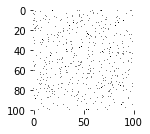

In [87]:
%matplotlib inline
terrain2chass = casse_du_code_du_travail()
size = np.array(terrain2chass.shape)
dpi = 72.0
figsize = size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)
im=plt.imshow(terrain2chass, interpolation = 'nearest', cmap = plt.cm.gray_r)